In [2]:
from sklearn.model_selection import train_test_split

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
apple = pd.read_csv('HistoricalQuotes.csv')
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [16]:
apple['year'] = pd.DatetimeIndex(apple.Date).year
apple.head()

,Date,Close/Last,Volume,Open,High,Low,year
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,2020
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,2020
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,2020
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,2020
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,2020


#### Filtering data for only 2020 and 2019 yeer

In [21]:
apple_df = apple[(apple['year'] == 2020) | (apple['year'] == 2019)] 

In [22]:
#training days
print('Training days =', apple_df.shape)

Training days = (292, 7)


#### let's start cleaning our data

In [23]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         292 non-null    object
 1    Close/Last  292 non-null    object
 2    Volume      292 non-null    int64 
 3    Open        292 non-null    object
 4    High        292 non-null    object
 5    Low         292 non-null    object
 6   year         292 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 17.1+ KB


In [41]:
apple_df.Date = pd.DatetimeIndex(apple_df.Date)

In [42]:
apple_df.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
year                   int32
dtype: object

- Removing extra spaces from column names

In [43]:
apple_df.rename(columns=lambda x: x.strip(), inplace=True)
apple_df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'year'], dtype='object')

- Close/Last, open, high, low should be float. So, converting datatype from object to float

In [47]:
#renaming close/last column name to just close
apple_df.rename(columns= {'Close/Last': 'Close'},inplace=True)

In [51]:
#now making necessary changes to column values before changing their dtype
#looks like we have spaces in our column vals as well. let's correct them
apple_df['Close'] = apple_df['Close'].apply(lambda x: x.strip())
apple_df['Open'] = apple_df['Open'].apply(lambda x: x.strip())
apple_df['High'] = apple_df['High'].apply(lambda x: x.strip())
apple_df['Low'] = apple_df['Low'].apply(lambda x: x.strip())

In [53]:
#now let's remove $ from these columns
apple_df['Close'] = apple_df['Close'].apply(lambda x: float(x.strip("$")))
apple_df['Open'] = apple_df['Open'].apply(lambda x: float(x.strip("$")))
apple_df['High'] = apple_df['High'].apply(lambda x: float(x.strip("$")))
apple_df['Low'] = apple_df['Low'].apply(lambda x: float(x.strip("$"))) 

In [54]:
apple_df.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
year               int32
dtype: object

In [61]:
#sorting by date
apple_df.sort_values(by='Date', inplace=True)

In [72]:
apple_df.reset_index(inplace=True)

In [75]:
apple_df.drop(columns='index', inplace=True) 

#### Let's visualise the Apple stock price data (2019-2020)

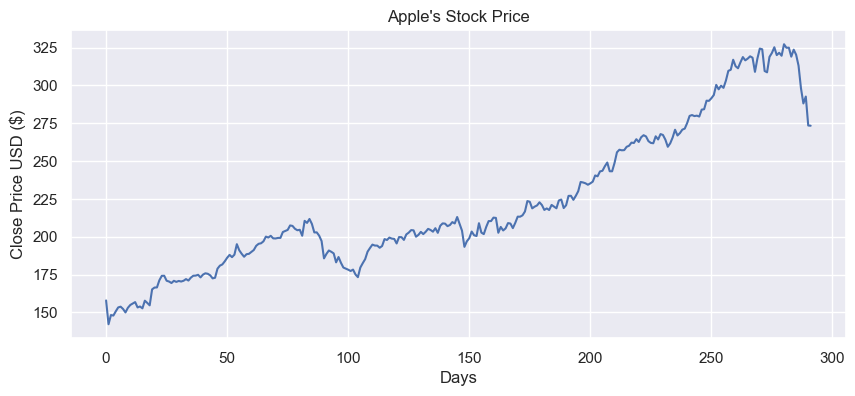

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,4))
plt.title("Apple's Stock Price")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(apple_df['Close'])
plt.show() 